# AD&D Churn Analysis And Modeling

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.us@gmail.com

Date: 2022-12-27

Re:&nbsp;&nbsp;&nbsp; Churn Analysis from 10/5/2022 to 11/5/2022

## EDA Histograms-Skew-Kurtosis

- Only columns 1 & 17 have skew >= 2.0. This is ok since BOTH are binary,
- **Accept all columns unchanged.**

---

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import ipywidgets as widgets
import scipy.stats as stats

# Load Cleaned Churn Data
df = pd.read_csv("../data/processed/mcc_clean_churn.csv")


#from plotly.offline import init_notebook_mode
#import plotly as py
#import plotly.graph_objects as go

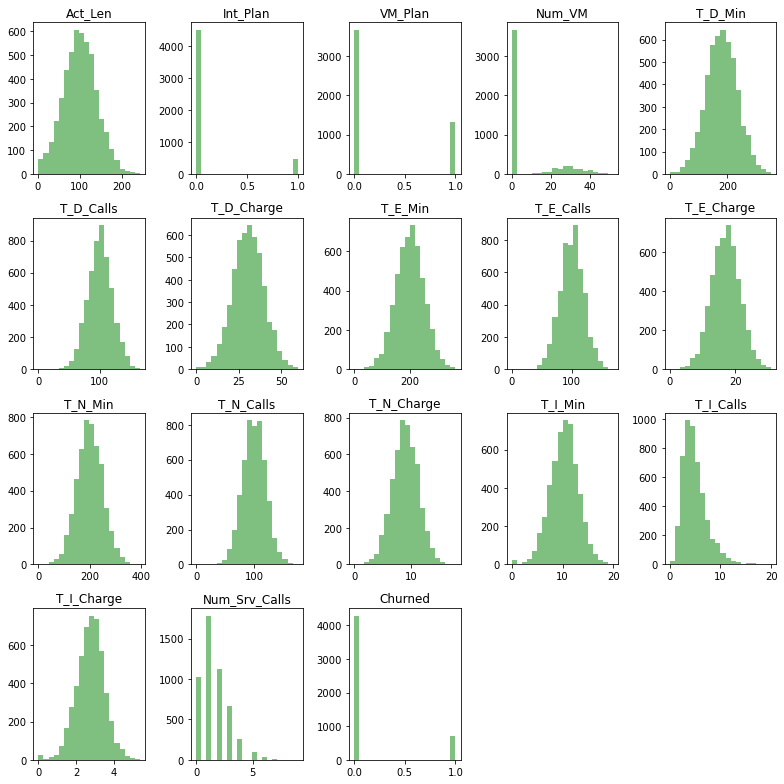

In [7]:
# Define figure size & number of columns and rows for Histograms
ncols = 5
nrows = int(np.ceil(len(df.columns) / (1.0 * ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(11, 11))

# Display Histograms by number and column numbers.
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]

        # Plot Counter
        if counter < len(df.columns):
            ax.hist(df[df.columns[counter]],
                    bins=20,
                    color='green',
                    alpha=0.5,
                    label='{}'.format(df.columns[counter]))
            ax.set_title(df.columns[counter])
            #ax.set_ylim([0, 5000])

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        counter += 1
        plt.tight_layout()
plt.show()

In [8]:
# Prepare Mean, Median, Std, Skew, and Kurtosis values for each column.

print('Col#\tMean\tMed.\tSigma\tSkew\tKurtosis')
print('='*50)

for i in range(0,18):
    c_men = df.iloc[:,i].mean()
    c_med = df.iloc[:,i].median()
    c_std = df.iloc[:,i].std()
    c_ske = df.iloc[:,i].skew()
    c_kur = df.iloc[:,i].kurtosis()
    print(f'{i}\t{c_men:.1f}\t{c_med:.1f}\t{c_std:.1f}\t{c_ske:.2f}\t{c_kur:.2f}')
      

Col#	Mean	Med.	Sigma	Skew	Kurtosis
0	100.3	100.0	39.7	0.11	-0.10
1	0.1	0.0	0.3	2.77	5.68
2	0.3	0.0	0.4	1.07	-0.86
3	7.8	0.0	13.5	1.35	0.20
4	180.3	180.1	53.9	-0.01	-0.02
5	100.0	100.0	19.8	-0.08	0.18
6	30.6	30.6	9.2	-0.01	-0.02
7	200.6	201.0	50.6	-0.01	0.05
8	100.2	100.0	19.8	-0.02	0.12
9	17.1	17.1	4.3	-0.01	0.05
10	200.4	200.4	50.5	0.02	0.08
11	99.9	100.0	20.0	0.00	0.14
12	9.0	9.0	2.3	0.02	0.08
13	10.3	10.3	2.8	-0.21	0.66
14	4.4	4.0	2.5	1.36	3.27
15	2.8	2.8	0.7	-0.21	0.66
16	1.6	1.0	1.3	1.04	1.48
17	0.1	0.0	0.3	2.06	2.24


### Distribution of Uniform 'states' Data

<AxesSubplot:>

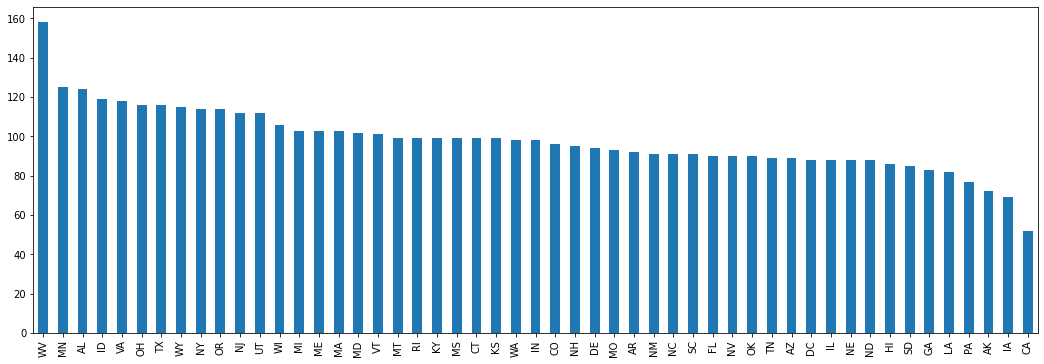

In [10]:
df = pd.read_csv("../data/raw/churn.all2")

df['state'].value_counts().plot(kind='bar',figsize=(18,6))

### Categorical Data 

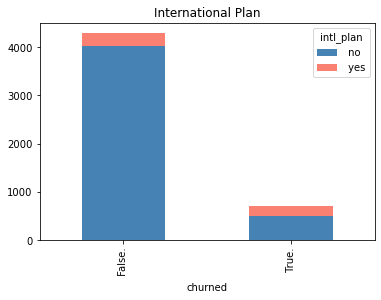

In [11]:
df.groupby(['churned', 'intl_plan']).size().unstack().plot(kind='bar', 
                                                           stacked=True,
                                                           color=['steelblue', 'salmon'], 
                                                           title='International Plan');

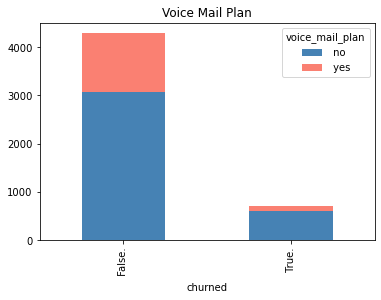

In [12]:
df.groupby(['churned', 'voice_mail_plan']).size().unstack().plot(kind='bar', 
                                                                 stacked=True,
                                                                 color=['steelblue', 'salmon'], 
                                                                 title='Voice Mail Plan');